# i. Perkenalan

**Nama**: Alfarabi

**Batch**: BSD 005

**Dataset**: [Tweet Covid19](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)

**Hugging Face**: [Tweet Covid19](https://huggingface.co/spaces/Alfarabi58/Tweets_Covid19)

**Problem Statement**: Pandemi COVID-19 yang dimulai pada akhir 2019 telah memberikan dampak signifikan pada kehidupan manusia di seluruh dunia, tidak hanya dalam bidang kesehatan tetapi juga aspek sosial, ekonomi, dan psikologis. Menghadapi krisis ini, berbagai data terkait COVID-19, termasuk data tekstual dari berita, media sosial, dan laporan ilmiah, menjadi sumber informasi yang sangat berharga. Dataset "COVID-19 NLP Text Classification" dari Kaggle berisi teks terkait COVID-19 yang dapat dianalisis untuk mengklasifikasikan sentimen publik, tema diskusi, dan deteksi berita palsu. Analisis teks ini penting untuk membantu pemerintah dan organisasi kesehatan memahami reaksi masyarakat, menyaring informasi penting, dan merespons kebutuhan publik secara lebih efektif. Model NLP dan klasifikasi teks yang dikembangkan dari dataset ini dapat memberikan wawasan yang berharga untuk pengambilan keputusan yang lebih baik selama pandemi, memastikan respons yang tepat dan cepat terhadap berbagai tantangan yang muncul.

**Objective**: Menggunakan deep learning untuk menganalisis dataset "COVID-19 NLP Text Classification" adalah untuk mengembangkan model yang dapat mendeteksi dan mengklasifikasikan sentimen publik.

# ii. Import Libraries

In [40]:
# Import Libraries
import re
import os
import nltk
import string
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as tf_hub

from google.colab import files
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# iii. Data Loading

Pada proses data loading saya akan memasukan dataset ke dalam python. Dataset yang saya gunakan adalah ['Dataset Covid19'](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data)

In [10]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

Dataset URL: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
License(s): copyright-authors
  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 246MB/s]


Saya akan mengunduh file ZIP 'covid-19-nlp-text-classification.zip', mengekstraknya ke direktori '/content/covid-19-nlp-text-classification/', dan kemudian menampilkan daftar isi dari direktori tersebut.

In [11]:
# Ganti nama file zip sesuai dengan nama file yang diunduh
zip_path = '/content/covid-19-nlp-text-classification.zip'
extract_path = '/content/covid-19-nlp-text-classification/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List isi direktori dataset
os.listdir(extract_path)

['Corona_NLP_test.csv', 'Corona_NLP_train.csv']

Lalu saya akan mengimport dataset COVID-19 NLP Text Classification yang telah diekstrak ke dalam DataFrame.

In [12]:
# Ganti path dengan path dataset yang telah diekstrak
dataset_path = '/content/covid-19-nlp-text-classification/Corona_NLP_train.csv'
df = pd.read_csv(dataset_path, encoding='latin1')

Kemudian saya akan menampilkan 10 data teratas dan 10 data terbawah.

In [ ]:
# Menampilkan 10 data teratas
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
# Menampilkan 10 data terbawah
df.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41151,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


Selanjutnya saya akan mengecek informasi pada dataset.

In [ ]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Informasi yang didapat diatas adalah:
1. Jumlah baris pada dataset 41157
2. Jumlah kolom pada dataset 6 kolom
3. Tipe data pada dataset adalah data numerik dan data kategori
4. Tidak terdapat data null

Kemudian saya akan mengcek missing value pada dataset.

In [ ]:
# Cek missing value
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Terdapat missing value pada kolom Location dan saya akan melakukan drop pada missing value pada kolom Location.

In [ ]:
# Drop missing value
df.dropna(inplace=True)

Lalu saya akan mengcek apakah ada data duplikat pada dataset.

In [ ]:
# Cek duplikat data
df.duplicated().sum()

0

Tidak ada duplikat data pada dataset.

Setelah itu saya akan mengecek nama kolom pada dataset.

In [ ]:
# Cek nama kolom
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

Kemudian saya akan mengecek jumlah unique value pada setiap kolom.

In [ ]:
# Cek jumlah unique value
df.nunique()

UserName         32567
ScreenName       32567
Location         12220
TweetAt             30
OriginalTweet    32567
Sentiment            5
dtype: int64

# iv. Exploratory Data Analysis (EDA)

1. Objective: Melihat Top 10 lokasi yang sering melakukan tweet tentang covid19.

<ipython-input-13-4092bb2135ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


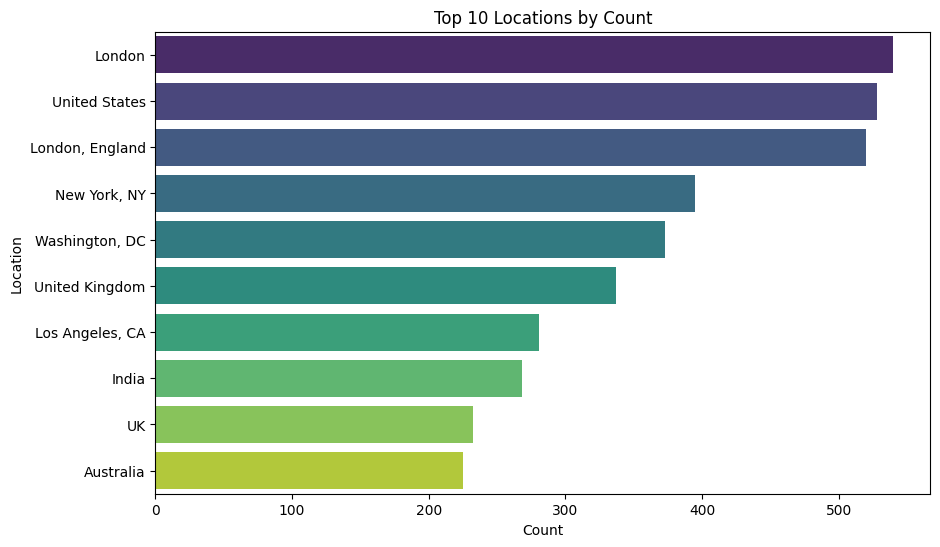

In [ ]:
top_locations = df['Location'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 10 Locations by Count')
plt.show()

Bar chart diatas menunjukan bahwa lokasi yang paling sering melakukan tweet tentang covid adalah London.

2. Objective: Melihat distibusi sentiment pada dataset.

<ipython-input-14-b333a711e969>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


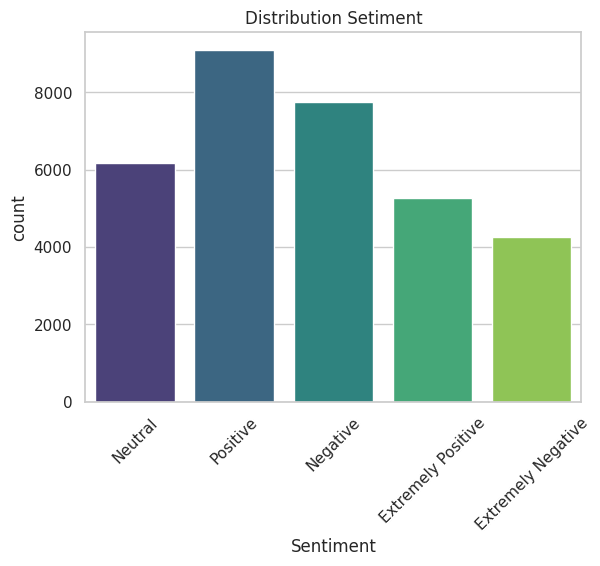

In [ ]:
# Plotting the distribution of classes
sns.set(style="whitegrid")
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution Setiment')
plt.show()

Informasi dari bar chart diatas bahwa tweet terbanyak tentang covid19 adalah tweet positive dan tweet yang paling sedikit adalah tweet extreamly negative.

3. Objective: Melihat distribusi tweet positive berdasarkan lokasi dan tweet negative berdasarkan lokasi.

<ipython-input-15-8bd299c7b2ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets["Location"].fillna("Unknown", inplace=True)
<ipython-input-15-8bd299c7b2ec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets["Location"].fillna("Unknown", inplace=True)
<ipython-input-15-8bd299c7b2ec>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_locations.values, y=top_positive_locations.index, palette="viridis", ax=axs[0])
<ipython-input-

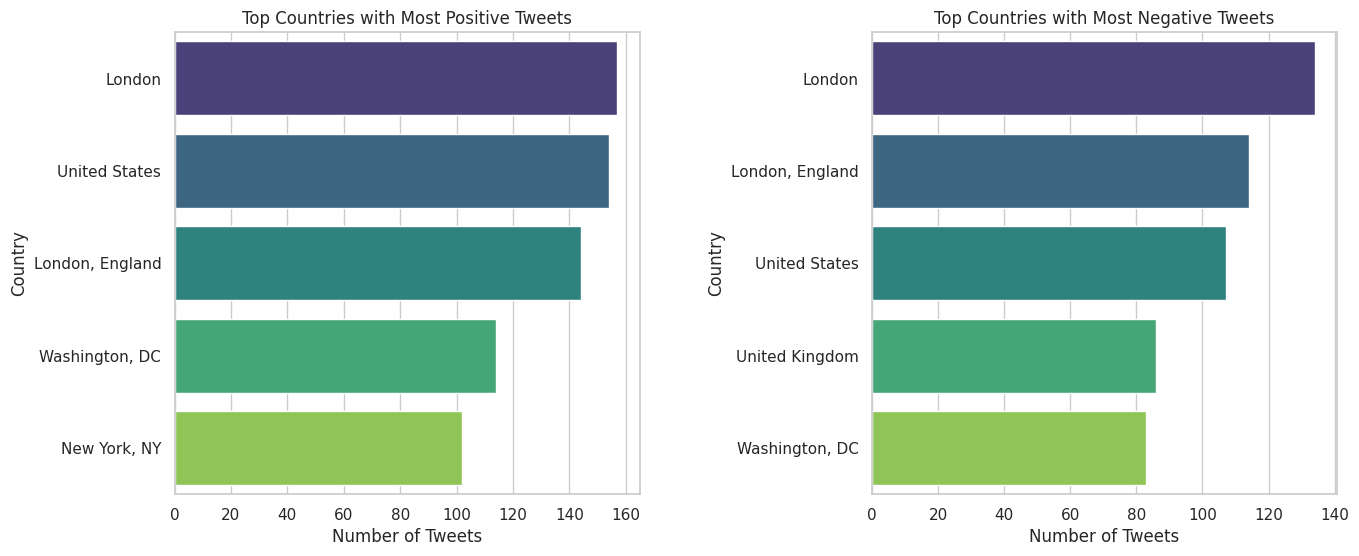

In [ ]:
# Select positive tweets
positive_tweets = df[df["Sentiment"] == "Positive"]

# Fill NaN values
positive_tweets["Location"].fillna("Unknown", inplace=True)

# Select the top 5 countries where the most positive tweets were made
top_positive_locations = positive_tweets["Location"].value_counts().nlargest(5)

# Select negative tweets
negative_tweets = df[df["Sentiment"] == "Negative"]

# Fill NaN values
negative_tweets["Location"].fillna("Unknown", inplace=True)

# Select the top 5 countries where the most negative tweets were made
top_negative_locations = negative_tweets["Location"].value_counts().nlargest(5)

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for positive tweets
sns.barplot(x=top_positive_locations.values, y=top_positive_locations.index, palette="viridis", ax=axs[0])
axs[0].set_title("Top Countries with Most Positive Tweets")
axs[0].set_xlabel("Number of Tweets")
axs[0].set_ylabel("Country")

# Plot for negative tweets
sns.barplot(x=top_negative_locations.values, y=top_negative_locations.index, palette="viridis", ax=axs[1])
axs[1].set_title("Top Countries with Most Negative Tweets")
axs[1].set_xlabel("Number of Tweets")
axs[1].set_ylabel("Country")

# Adjust subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

Berdasarkan bar chart diatas bahwa:
- **Tweet positif**: London menjadi lokasi terbanyak yang melakukan tweet positive.
- **Tweet negatif**: London juga menjadi lokasi terbanyak yang melakukan tweet negative.

4. Objective: Melihat kata-kata yang paling sering keluar pada OriginalTweet.

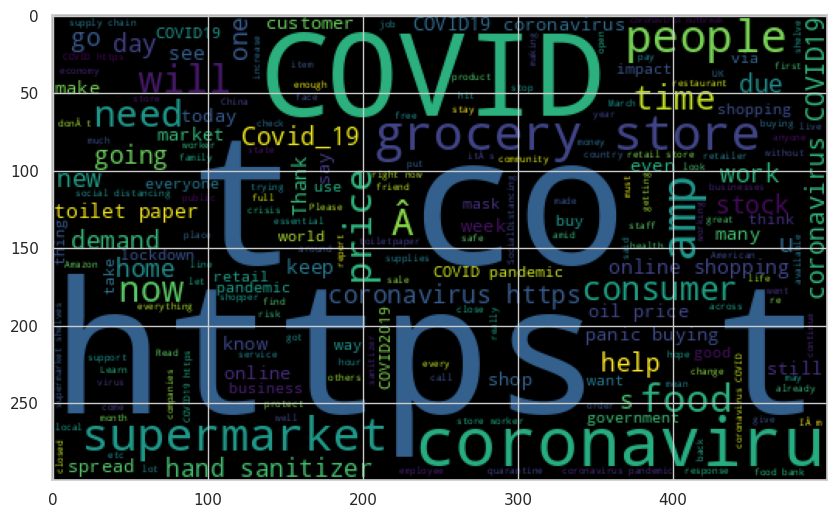

In [ ]:
# Menggabungkan semua text pada kolom originaltweet dengan spasi
allWords = ' '.join([tweet for tweet in df["OriginalTweet"]])
allWords[:1000]

wordCloud = WordCloud(width=500,
                     height = 300,
                     random_state = 2023).generate(allWords)

plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.show()

Informasi diatas menunjukan bahwa kata-kata yang paling sering keluar pada OriginalTweet yaitu `https`, `COVID`, `t`, `co`, dll.

5. Objective: Melihat kata-kata yang paling sering keluar pada sentiment `negative`, `neutral`, dan `positve`.

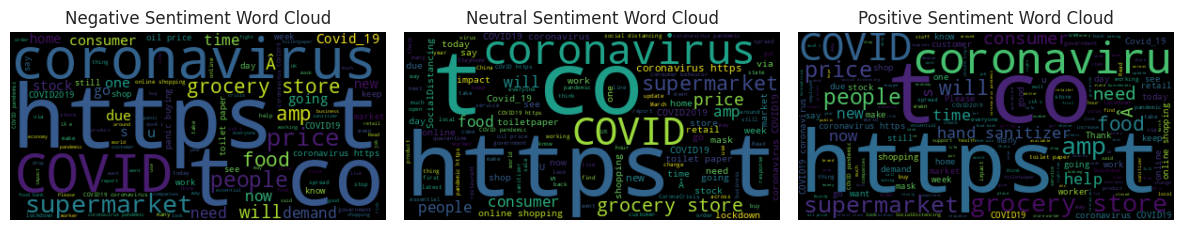

In [ ]:
negative_text = ' '.join(df[df.Sentiment == 'Negative'].OriginalTweet.tolist())
neutral_text = ' '.join(df[df.Sentiment == 'Neutral'].OriginalTweet.tolist())
positive_text = ' '.join(df[df.Sentiment == 'Positive'].OriginalTweet.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

Informasi diatas menunjukan bahwa:
- **Negative sentiment**: kata-kata yang paling sering keluar yaitu `https`, `COVID`, `coronavirus`, `t`, `co`, dll.
- **Neutral sentiment**: kata-kata yang paling sering keluar yaitu `https`, `COVID`, `coronavirus`, `t`, `co`, dll.
- **Positve sentiment**: kata-kata yang paling sering keluar yaitu `https`, `COVID`, `coronavirus`, `t`, `co`, dll.

# v. Feature Engineering

Sebelum melakukan text preprocessing saya akan menghapus kolom yang tidak akan saya pakai.

In [13]:
# Drop kolom
df.drop(['UserName','ScreenName','Location','TweetAt'], axis = 1, inplace = True)

# Menampilkan 5 Baris teratas setelah dilakukan drop kolom
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Lalu saya akan menggabungkan sentiment extreamly positive kedalam positive dan menggabungkan sentiment extreamly negative kedalam negative.

In [14]:
# Memetakan nilai pada kolom 'Sentiment' ke kategori yang lebih umum
df['Sentiment'] = df['Sentiment'].map({
    'Extremely Positive': 'Positive',
    'Extremely Negative': 'Negative',
    'Positive': 'Positive',
    'Negative': 'Negative',
    'Neutral': 'Neutral'})

# Cetak kolom 'Sentiment' setelah dilakukan pemetaan
print(df['Sentiment'])

0         Neutral
1        Positive
2        Positive
3        Positive
4        Negative
           ...   
41152     Neutral
41153    Negative
41154    Positive
41155     Neutral
41156    Negative
Name: Sentiment, Length: 41157, dtype: object


### v.i Text Preprocessing

Kemudian saya akan menghapus kata-kata yang tidak penting dari teks untuk meningkatkan efisiensi dan akurasi model pembelajaran mesin atau analisis teks lainnya.

In [15]:
# Define Stopwords
stpwds_id = list(set(stopwords.words('english')))

# Add custom stopwords
custom_stopwords = [
    'the', 'to', 'and', 'of', 'a', 'in', 'for', '#coronavirus', 'is', 'are', 'on', 'I', 'you', 'at', 'prices', 'with', 'have', 'this', 'that', 'be', 'grocery',
    'store', 'as', 'food', 'supermarket', 'from', 'people', 'your', 'will', 'it', 'all', 'The', 'COVID-19', 'we', 'not', 'has', '&', 'by', 'our', 'or', '19',
    'can', 'out', 'my', 'up', '#COVID19', 'their', 'more', 'they', 'during', ''
]
stpwds_id.extend(custom_stopwords)

# Define Stemming
stemmer = PorterStemmer()

Selanjutnya saya akan  mengimplementasikan serangkaian tahapan pra-pemrosesan teks, termasuk pengubahan ke huruf kecil, penghapusan URL, hashtag, angka, karakter non-huruf, serta tokenisasi, penghapusan stopwords, stemming, dan penggabungan kembali token untuk mempersiapkan teks untuk analisis lebih lanjut.

In [16]:
# Create A Function for Text Preprocessing
def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Mention removal
    text = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Newline removal (\n)
    text = re.sub(r'[\n\r]', '', text)

    # Replaces the numbers with an empty string
    text = re.sub(r'\d+', '', text)

    # Whitespace removal
    text = text.strip()

    # URL removal
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)

    # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc.)
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stpwds_id]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Combining Tokens
    text = ' '.join(tokens)

    return text

Setelah melakukan pembersihan text saya akan memasukan kedalam kolom baru untuk dilakukan proses vectorization dan embedding.

In [17]:
# Applying Text Preprocessing to the Dataset
df['tweet_processed'] = df['OriginalTweet'].apply(lambda x: text_preprocessing(x))
df

,OriginalTweet,Sentiment,tweet_processed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi phil gahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,stock one empti pleas n't panic enough everyon...
4,"Me, ready to go at supermarket during the #COV...",Negative,readi go covid outbreak 'm paranoid stock litt...
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock shelv nz lockdown covid
41153,Response to complaint not provided citing COVI...,Negative,respons complaint provid cite covid relat dela...
41154,You know itÂs getting tough when @KameronWild...,Positive,know get tough kameronwild ration toilet paper...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanit start turn coronaviru c...


### v.ii Target Conversion

Pada proses ini saya akan mengkonversikan variabel target (Sentiment) kedalam bentuk numerik.

In [18]:
# Display Target
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

Setelah mengkonversi variabel target saya akan memasukannya kedalam kolom baru (label).

In [19]:
# Change Target into Number
df['label'] = df['Sentiment'].replace({'Neutral' : 0, 'Positive' : 1, 'Negative' : 2})
df

,OriginalTweet,Sentiment,tweet_processed,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi phil gahan chrisitv,0
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...,1
3,My food stock is not the only one which is emp...,Positive,stock one empti pleas n't panic enough everyon...,1
4,"Me, ready to go at supermarket during the #COV...",Negative,readi go covid outbreak 'm paranoid stock litt...,2
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock shelv nz lockdown covid,0
41153,Response to complaint not provided citing COVI...,Negative,respons complaint provid cite covid relat dela...,2
41154,You know itÂs getting tough when @KameronWild...,Positive,know get tough kameronwild ration toilet paper...,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanit start turn coronaviru c...,0


Lalu saya akan melihat distribusi label pada variabel target.

In [20]:
# Target Distribution
df['label'].value_counts()

label
1    18046
2    15398
0     7713
Name: count, dtype: int64

### v.iii Data Splitting

Saya akan memisahkan variabel feature dan variable target, untuk dilakukan vectorization dan embeding pada variabel feature.

In [21]:
# Splitting between `X` and `y`
X = df.drop('Sentiment', axis=1)
y = df['Sentiment']

Kemudian saya akan memisahkan variabel X dan y menjadi 3 bagian train, val, dan test. val atau validation dibuat bertujuan untuk memantau performa model pada data yang tidak terlihat selama pelatihan. Hal ini membantu memastikan bahwa model tidak hanya menghafal data pelatihan (overfitting), tetapi juga mampu melakukan generalisasi pada data baru.

In [22]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(df.tweet_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (31484,)
Val Size   :  (3499,)
Test Size  :  (6174,)


Lalu saya akan melakukan one hot encoding pada variabel y.

In [23]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### v.iv Handling Missing Value

Pada proses ini saya hanya akan mengecek missing value pada variabel X, dikarenakan saya sudah mendrop missing value pada saat data loading.

Cek missing value pada X_train.

In [24]:
# Cek missing value X-train
X_train.isnull().sum()

0

Cek missing value pada X_val.

Tidak ada missing value pada X_train.

In [25]:
X_val.isnull().sum()

0

Tidak ada missing value pada X_val.

Cek missing value pada X_test.

In [26]:
X_test.isnull().sum()

0

Tidak ada missing value pada X_test.

### v.v Text Vectorization

Pada proses text vectorization saya akan mengubah data teks mentah menjadi representasi numerik yang dapat diproses oleh model deep learning. Vectorization sangat penting karena model deep learning hanya dapat menangani input numerik, bukan data teks mentah.

Pertama saya akan menggunakan CountVectorizer untuk mengubah teks mentah dari data pelatihan dan pengujian menjadi representasi numerik dalam bentuk matriks sparse dokumen-term yang dapat digunakan dalam model deep learning.

In [27]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<31484x37635 sparse matrix of type '<class 'numpy.int64'>'
	with 504416 stored elements in Compressed Sparse Row format>

Kemudian saya akan menghitung jumlah total kata unik (kosakata) dan panjang kalimat maksimum dalam data pelatihan, kemudian mencetak hasilnya.

In [28]:
# Finding the Number of Vocabs and Max Token Length in One Document
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  37635
Maximum Sentence Length :  47 tokens


Terdapat Total Vocab 32268 dan Maximum Sentence Length 47 tokens pada variabel X_train.

Lalu saya akan menggunakan TextVectorization untuk mengubah teks mentah dari data pelatihan menjadi representasi numerik dengan parameter yang ditentukan, termasuk pengaturan untuk normalisasi teks, tokenisasi, dan panjang output, lalu menyesuaikan lapisan tersebut dengan data pelatihan.

In [29]:
# Parameters for TextVectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

Setelah itu saya akan menampilkan contoh dokumen yang telah diproses, hasil vektorisasi teks dari contoh dokumen tersebut, dan ukuran vektor yang dihasilkan.

In [30]:
# Document example
print('Document example')
print(df.tweet_processed[0])
print('')

# Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df.tweet_processed[0]]))
print('Vector size : ', text_vectorization([df.tweet_processed[0]]).shape)

Document example
menyrbi phil gahan chrisitv

Result of Text Vectorization
tf.Tensor(
[[24642  5150 29818  9468     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]], shape=(1, 47), dtype=int64)
Vector size :  (1, 47)


Kemudian saya akan menampilkan 20 kata pertama dari kosakata yang dipelajari oleh objek text_vectorization selama proses pelatihan teks.

In [31]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'covid',
 'coronaviru',
 'consum',
 'shop',
 'amp',
 'go',
 'get',
 'need',
 's',
 'onlin',
 'time',
 'pandem',
 'buy',
 'work',
 'sanit',
 'worker',
 'hand',
 'help']

### v.vi Word Embedding

Pada proses word embedding saya akan melakukan representasi numerik dari kata-kata yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing, NLP). Representasi ini memungkinkan komputer untuk memahami makna kata-kata berdasarkan konteks di mana kata-kata tersebut digunakan.

Pertama saya akan melakukan layer embedding dalam sebuah model neural network untuk pemrosesan bahasa natural, dengan jumlah input neuron sesuai total vocabulary, dimensi output neuron sebesar 128, inisialisasi bobot menggunakan metode uniform, dan panjang input yang diharapkan setiap kalimat adalah max_sen_len.

In [32]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Lalu saya akan mencetak teks dari dokumen yang telah diproses, menghasilkan representasi vektor teks setelah dilakukan vectorization, dan kemudian menghasilkan embedding vektor dari representasi tersebut.

In [33]:
# Document example
print('Document example')
print(df.tweet_processed[0])
print('')

# Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.tweet_processed[0]]))
print('Vector size : ', text_vectorization([df.tweet_processed[0]]).shape)
print('')

# Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.tweet_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df.tweet_processed[0]])).shape)

Document example
menyrbi phil gahan chrisitv

Result of  Text Vectorization
tf.Tensor(
[[24642  5150 29818  9468     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]], shape=(1, 47), dtype=int64)
Vector size :  (1, 47)

Result of  Embedding
tf.Tensor(
[[[ 0.01591482  0.00296758 -0.02555733 ... -0.00841577  0.01732462
   -0.00891405]
  [-0.03042259  0.00057565  0.00848382 ...  0.00675808 -0.0375057
   -0.03868048]
  [-0.00381755 -0.03403085 -0.02950033 ...  0.04478377 -0.03325647
   -0.02378031]
  ...
  [ 0.04914719 -0.04091989 -0.00306891 ... -0.0456971   0.00751603
    0.02597466]
  [ 0.04914719 -0.04091989 -0.00306891 ... -0.0456971   0.00751603
    0.02597466]
  [ 0.04914719 -0.04091989 -0.00306891 ... -0.0456971   0.00751603
    0.02597466]]], shape=(1, 47, 128), dtype=floa

# vi. ANN Training (Sequential API)

Pada proses pelatihan model Artificial Neural Network (ANN) saya menggunakan Sequential API melibatkan penyusunan lapisan neural secara berurutan, kompilasi model dengan fungsi loss dan optimizer yang sesuai, lalu melatih model menggunakan data training untuk menyesuaikan bobot melalui iterasi berbasis backpropagation, sambil memantau kinerja pada data validasi.

### vi. 1. Model Definition

Pada proses ini saya melakukan training model dengan menggunakan model LTSM yang merupakan jaringan neural berurutan yang terdiri dari lapisan text vectorization dan embedding untuk memproses teks, diikuti oleh lima lapisan LSTM tanpa bidirectional dengan ukuran neuron yang menurun secara bertahap (128, 64, 32, 16, dan 8) masing-masing dengan initializer GlorotUniform dan dropout 0.1, serta satu lapisan Dense dengan 3 neuron output dan fungsi aktivasi softmax untuk klasifikasi multikelas.

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
tf.random.set_seed(seed)

# Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization)  # Assuming this is a layer for text vectorization
model_lstm_2.add(embedding)  # Assuming this is your embedding layer

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

model_lstm_2.add(Dense(3, activation='softmax'))

Selanjutnya saya akan menampilkan diagram visual dari arsitektur model model_lstm_2, dengan bentuk (shapes) dari setiap lapisan.

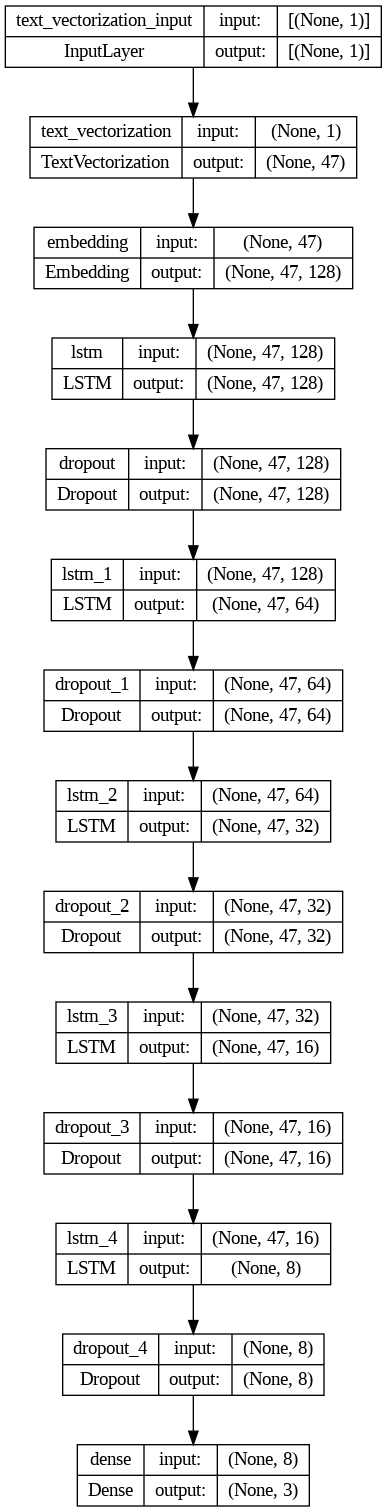

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_lstm_2, show_shapes=True)

### vi. 2. Model Training

Kemudian saya akan melakukan training dengan model LSTM dengan loss function  categorical_crossentropy, optimizer adam, dan metrik accuracy, kemudian melatih model menggunakan data pelatihan dengan callback EarlyStopping yang memonitor val_loss untuk menghentikan pelatihan jika tidak ada perbaikan selama 5 epoch berturut-turut, serta mengembalikan bobot terbaik model berdasarkan performa validasi.

In [ ]:
%%time

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50,
                                      validation_data=(X_val, y_val_ohe),
                                      callbacks=[early_stopping])

Epoch 1/50
779/779 [==============================] - 231s 283ms/step - loss: 0.5068 - accuracy: 0.8403 - val_loss: 0.6354 - val_accuracy: 0.7757
Epoch 2/50
779/779 [==============================] - 209s 268ms/step - loss: 0.3486 - accuracy: 0.8908 - val_loss: 0.5590 - val_accuracy: 0.7996
Epoch 3/50
779/779 [==============================] - 213s 273ms/step - loss: 0.2785 - accuracy: 0.9157 - val_loss: 0.6674 - val_accuracy: 0.7830
Epoch 4/50
779/779 [==============================] - 215s 277ms/step - loss: 0.2387 - accuracy: 0.9303 - val_loss: 0.6819 - val_accuracy: 0.7761
Epoch 5/50
779/779 [==============================] - 214s 274ms/step - loss: 0.2069 - accuracy: 0.9409 - val_loss: 0.7370 - val_accuracy: 0.7768
Epoch 6/50
779/779 [==============================] - 212s 272ms/step - loss: 0.1758 - accuracy: 0.9510 - val_loss: 0.7621 - val_accuracy: 0.7840
Epoch 7/50
779/779 [==============================] - 211s 271ms/step - loss: 0.1498 - accuracy: 0.9585 - val_loss: 0.7974 -

Dari hasil training model mendapatkan hasil akhir accuracy score 0.95 dan val_accuracy score 0.75 dengan waktu running model selama 25 menit 4 detik.

Setelah itu saya akan menampilkan visualisasi hasil pelatihan model LSTM, dengan dua subplot yang menunjukkan perubahan akurasi dan kehilangan (loss) selama pelatihan untuk data pelatihan dan validasi, membantu dalam memahami bagaimana model kinerjanya dan apakah ada overfitting atau underfitting.

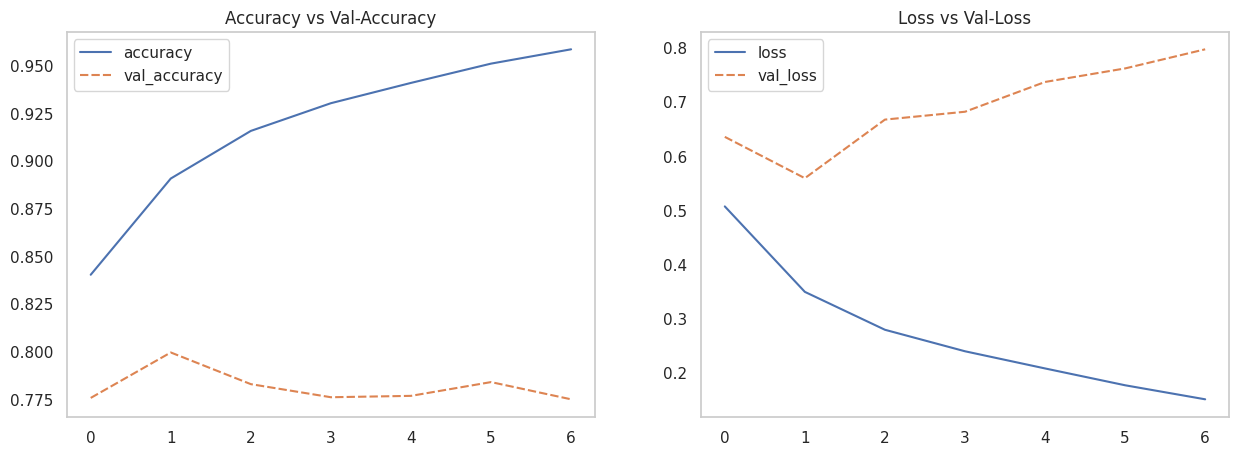

In [ ]:
# Plot Training Results
model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari hasil visualisasi lineplot training model dapat dilihat bahwa kinerja model masih terindetifikasi overfitting dari epoch 1 hingga epoch 6.

# vii. ANN Improvement (Sequential API)

Dikarenakan hasil dari training model masih teridentifikasi overfitting, saya akan melakukan model improvement dengan tujuan untuk membangun, melatih, dan menyempurnakan model ANN secara bertahap dengan menambahkan atau mengurangi lapisan secara berurutan, sehingga mengoptimalkan kinerja model untuk tugas prediksi tertentu melalui proses pelatihan yang efisien.

### vii.1. Model Definition

Untuk meningkatkan model LSTM saya akan mencoba mengurangi lapisan yang terdiri dari lapisan text vectorization dan embedding diikuti oleh dua lapisan LSTM berurutan dengan 64 dan 32 unit masing-masing, menggunakan kernel initializer GlorotUniform dengan regularisasi L2, dan dropout 20%, serta lapisan output Dense dengan 3 unit dan fungsi aktivasi softmax untuk klasifikasi multikelas.

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
tf.random.set_seed(seed)

# Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)  # Assuming this is a layer for text vectorization
model_lstm_1.add(embedding)  # Assuming this is your embedding layer

# LSTM layer without Bidirectional
model_lstm_1.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                      kernel_regularizer=l2(0.01)))  # Add L2 regularization
model_lstm_1.add(Dropout(0.2))

# LSTM layer without Bidirectional
model_lstm_1.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                      kernel_regularizer=l2(0.01)))  # Add L2 regularization
model_lstm_1.add(Dropout(0.2))

model_lstm_1.add(Dense(3, activation='softmax'))

Selanjutnya saya akan menampilkan diagram visual dari improvement dengan arsitektur model model_lstm_1, dengan bentuk (shapes) dari setiap lapisan.

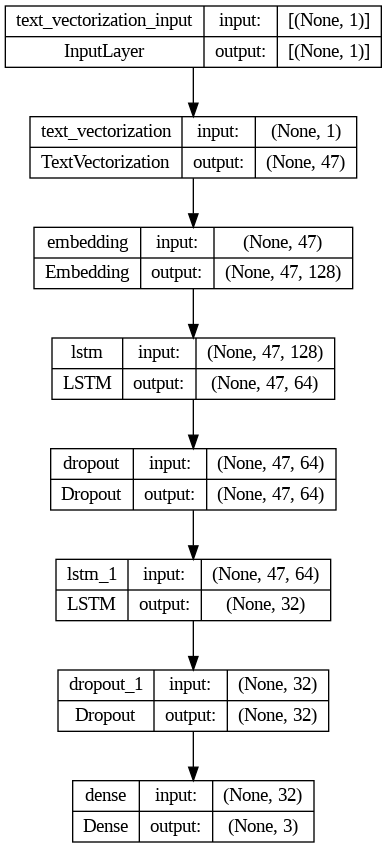

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_lstm_1, show_shapes=True)

### vii.2. Model Training

Lalu saya akan melakukan training pada improvement model dengan model LSTM dengan loss function  categorical_crossentropy, optimizer adam, dan metrik accuracy, kemudian melatih model menggunakan data pelatihan dengan callback EarlyStopping yang memonitor val_loss untuk menghentikan pelatihan jika tidak ada perbaikan selama 5 epoch berturut-turut, serta mengembalikan bobot terbaik model berdasarkan performa validasi.

In [ ]:
%%time

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with EarlyStopping
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50,
                                      validation_data=(X_val, y_val_ohe),
                                      callbacks=[early_stopping])

Epoch 1/50
779/779 [==============================] - 123s 150ms/step - loss: 1.0707 - accuracy: 0.5524 - val_loss: 0.8155 - val_accuracy: 0.6436
Epoch 2/50
779/779 [==============================] - 114s 146ms/step - loss: 0.6060 - accuracy: 0.7721 - val_loss: 0.5939 - val_accuracy: 0.7855
Epoch 3/50
779/779 [==============================] - 113s 145ms/step - loss: 0.3880 - accuracy: 0.8768 - val_loss: 0.6037 - val_accuracy: 0.7916
Epoch 4/50
779/779 [==============================] - 110s 142ms/step - loss: 0.2933 - accuracy: 0.9123 - val_loss: 0.6850 - val_accuracy: 0.7855
Epoch 5/50
779/779 [==============================] - 112s 144ms/step - loss: 0.2434 - accuracy: 0.9310 - val_loss: 0.7552 - val_accuracy: 0.7783
Epoch 6/50
779/779 [==============================] - 110s 142ms/step - loss: 0.2048 - accuracy: 0.9432 - val_loss: 0.8584 - val_accuracy: 0.7703
Epoch 7/50
779/779 [==============================] - 109s 139ms/step - loss: 0.1890 - accuracy: 0.9492 - val_loss: 0.8269 -

Dari hasil improvement model training  mendapatkan hasil accuracy score 0.94 dan val_accuracy score 0.76 dan mengalami improve dalam segi waktu running model menjadi 13 menit 10 detik.

Setelah itu saya akan melakukan improvement model training dengan model LSTM dengan loss function  categorical_crossentropy, optimizer adam, dan metrik accuracy, kemudian melatih model menggunakan data pelatihan dengan callback EarlyStopping yang memonitor val_loss untuk menghentikan pelatihan jika tidak ada perbaikan selama 5 epoch berturut-turut, serta mengembalikan bobot terbaik model berdasarkan performa validasi.

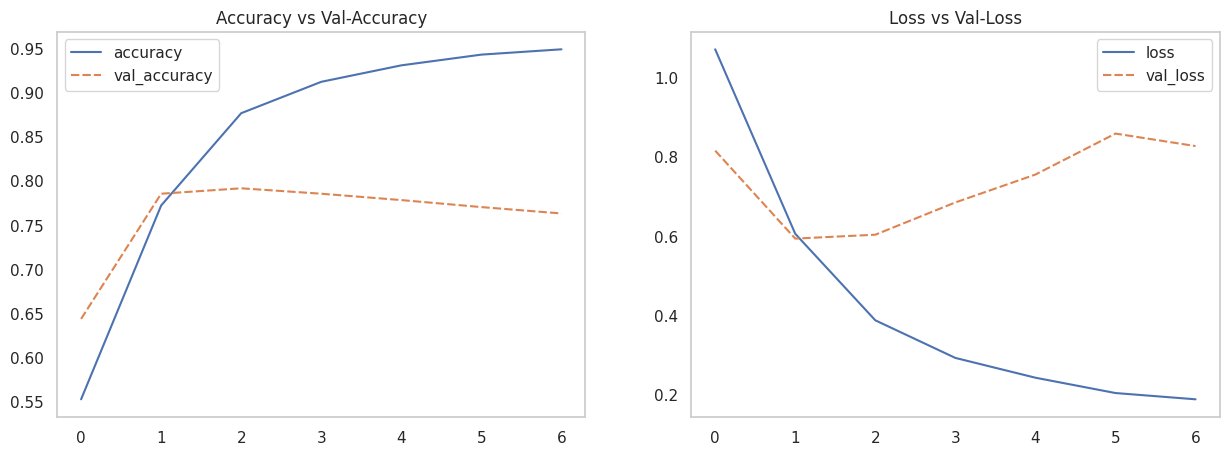

In [ ]:
# Plot Training Results
model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari hasil lineplot improvement model dapat disimpulkan bahwa kinerja model berubah menjadi goodfit sampai epoch 1, walaupun setelah itu mengalami overfitting kembali. Tetapi dapat disimpulkan bahwa model improvement telah berhasil dari segi waktu dan fit. Disini saya sudah melakukan transfer learning tetapi terjadi kendala pada google collab yaitu disconnect terus menerus dan berhubung waktu sudah sedikit dan saya sudah berusaha maksimal, pada akhirnya saya mengambil kinerja model diatas sebagai model improvement.

### vii.3. Model Evaluation

Pada proses model evaluation saya akan melakukan classification report dengan model yang saya pakai yaitu  model improvement `model_lstm_1`.

Lalu saya akan load best model yang telah di save untuk dilakukan proses classification report.

In [6]:
# Path dari file ZIP yang diunggah
zip_file_path = 'model.zip'  # Sesuaikan dengan nama file ZIP yang diunggah

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
# Path ke direktori yang berisi saved_model.pb
model_dir = 'model'  # Sesuaikan dengan direktori hasil ekstraksi

# Memuat model
model_lstm_1 = tf.keras.models.load_model(model_dir)

# Verifikasi model dengan melihat ringkasan
model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 47)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 47, 128)           4130304   
                                                                 
 lstm (LSTM)                 (None, 47, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 47, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

Kemudian saya akan memprediksi probabilitas untuk setiap kelas menggunakan model model_lstm_1 pada data pelatihan X_train, menentukan label kelas yang diprediksi dengan mengambil argmax di sepanjang sumbu terakhir dari probabilitas yang diprediksi, dan kemudian menghasilkan laporan klasifikasi yang merinci metrik evaluasi seperti precision, recall, F1-score, dan support untuk masing-masing kelas berdasarkan label sebenarnya y_train dan label yang diprediksi.

In [37]:
# Predict probabilities for each class
y_pred_seq_train_probs = model_lstm_1.predict(X_train)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_train = np.argmax(y_pred_seq_train_probs, axis=1)

# Classification report
print(classification_report(y_train, y_pred_seq_train))

984/984 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5900
           1       0.78      0.96      0.86     13805
           2       0.93      0.72      0.81     11779

    accuracy                           0.82     31484
   macro avg       0.83      0.80      0.81     31484
weighted avg       0.84      0.82      0.82     31484



Model pada train memiliki performa yang baik dengan akurasi 82%, menunjukkan keseimbangan yang baik antara precision dan recall di berbagai kelas. Kelas 1 memiliki recall yang sangat tinggi (0.96), menunjukkan model sangat baik dalam mendeteksi instance dari kelas ini, namun kelas 2 memiliki precision yang sangat tinggi (0.93), menunjukkan model sangat akurat dalam prediksi kelas ini. Tidak ada indikasi overfitting yang jelas, karena metrik evaluasi seperti precision, recall, dan F1-score menunjukkan konsistensi yang baik di seluruh kelas.

Lalu saya akan memprediksi probabilitas untuk setiap kelas menggunakan model model_lstm_1 pada data uji X_test, menentukan label kelas prediksi dengan mengambil argmax dari probabilitas yang diprediksi, dan menghasilkan laporan klasifikasi yang membandingkan label prediksi dengan label sebenarnya y_test untuk mengevaluasi kinerja model.

In [38]:
# Predict probabilities for each class
y_pred_seq_test_probs = model_lstm_1.predict(X_test)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_test = np.argmax(y_pred_seq_test_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred_seq_test))

193/193 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1157
           1       0.79      0.96      0.87      2707
           2       0.92      0.73      0.81      2310

    accuracy                           0.82      6174
   macro avg       0.83      0.80      0.81      6174
weighted avg       0.83      0.82      0.82      6174



Model pada test memiliki akurasi yang baik (0.82) dan menunjukkan performa yang seimbang antara kelas-kelas yang berbeda, dengan beberapa kelas menunjukkan performa yang sangat baik dalam hal recall (Class 1) dan precision (Class 2). Model tampaknya tidak overfit karena metrik evaluasi seperti precision, recall, dan F1-score menunjukkan konsistensi performa yang baik di seluruh kelas.

# viii. Model Saving

Dan setelah mendapatkan model terbaik saya akan menyimpan model tersebut untuk dilakukan proses inference.

In [ ]:
# Save the model
model_lstm_1.save('model')

# Directory name of model name
model_dir = 'model'

# Save model as TensorFlow SavedModel
model_lstm_1.save(model_dir, save_format='tf')

Download model dalam bentuk folder zip.

In [ ]:
# Compress the folder
!zip -r model.zip model

# Download the compressed folder
files.download('model.zip')

  adding: model/ (stored 0%)
  adding: model/assets/ (stored 0%)
  adding: model/saved_model.pb (deflated 82%)
  adding: model/fingerprint.pb (stored 0%)
  adding: model/keras_metadata.pb (deflated 89%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: model/variables/variables.index (deflated 60%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ix. Model Inference

Penjelasan ada di notebook `P2G7_Alfarabi_Inference.ipynb`

# x. Pengambilan Kesimpulan

1. Metrik akurasi dan interpretasinya dalam konteks bisnis terkait analisis tweet Covid-19:
- **Accuracy:** Persentase tweet yang diklasifikasikan dengan benar; penting untuk mendapatkan gambaran umum tentang kinerja model.
- **Precision:** Persentase tweet yang diklasifikasikan sebagai positif (atau negatif) yang benar-benar positif (atau negatif); penting untuk mengukur keandalan prediksi sentimen dalam kampanye komunikasi.
- **Recall:** Persentase tweet yang relevan (positif atau negatif) yang berhasil ditemukan oleh model; penting untuk memastikan tidak ada informasi penting yang terlewat dalam analisis.
- **F1-Score:** Harmonik rata-rata dari precision dan recall; penting untuk mendapatkan keseimbangan antara ketepatan dan keberhasilan deteksi sentimen yang relevan, terutama dalam pengambilan keputusan bisnis yang kritis.
Interpretasi bisnis dari metrik ini membantu dalam memahami bagaimana model prediksi sentimen dapat meningkatkan strategi komunikasi dan respons terhadap opini publik tentang Covid-19 di media sosial.

2. Kelebihan dan kekurangan model sequential:

`Kelebihan:`
- **Sederhana dan Mudah Diimplementasikan:**
Model Sequential mudah dipahami dan diimplementasikan, terutama untuk pemula yang baru belajar tentang deep learning dan pemrosesan bahasa alami (NLP).
- **Pemrosesan Data Berurutan:**
Model ini secara alami sesuai untuk data teks yang berurutan, seperti tweet, karena dapat memproses data sekuensial dengan baik, terutama saat menggunakan lapisan seperti LSTM atau GRU.
- **Penanganan Overfitting:**
Sequential model bisa dikombinasikan dengan teknik regularisasi seperti dropout dan batch normalization untuk mengurangi overfitting.
- **Fleksibilitas Struktur:**
Sequential model dapat dengan mudah dimodifikasi dan dioptimalkan dengan menambah atau mengurangi lapisan, serta mengubah fungsi aktivasi dan hyperparameter lainnya.

`Kekurangan:`
- **Ketidakmampuan Menangani Dependensi Jangka Panjang:**
Meskipun LSTM dan GRU dalam model Sequential dapat menangani dependensi jangka panjang lebih baik daripada RNN biasa, mereka masih bisa mengalami kesulitan dengan dependensi yang sangat panjang atau kompleks dalam teks.
- **Kurang Efisien untuk Model yang Sangat Kompleks:**
Untuk data yang sangat kompleks dan besar seperti tweet COVID-19 yang memiliki banyak variabel dan konteks, model Sequential mungkin tidak seefisien model yang lebih kompleks seperti Transformer (misalnya, BERT atau GPT).
- **Keterbatasan dalam Konteks Luas:**
Model Sequential sering kali memiliki keterbatasan dalam memahami konteks luas yang diperlukan untuk klasifikasi teks yang lebih canggih, terutama dibandingkan dengan arsitektur model yang lebih modern seperti Transformer.
- **Pengaturan Hyperparameter yang Kompleks:**
Meskipun model ini mudah diimplementasikan, pengaturan hyperparameter yang optimal bisa menjadi kompleks dan memerlukan banyak eksperimen, terutama dengan data yang beragam seperti tweet tentang COVID-19.

3. Dalam upaya untuk meningkatkan performa model klasifikasi teks COVID-19, saya berencana melakukan pengurangan jumlah layer pada model Sequential. Pengurangan ini diharapkan dapat menyederhanakan model, mengurangi risiko overfitting, serta mempercepat waktu pelatihan dan inferensi. Selain itu, dengan lebih sedikit layer, model mungkin lebih mampu menggeneralisasi pola-pola penting dalam data tanpa terlalu banyak penyesuaian terhadap noise. Kami juga akan melakukan tuning hyperparameter secara menyeluruh untuk memastikan bahwa pengurangan layer tidak mengorbankan akurasi dan kemampuan model dalam menangani konteks dari tweet yang dianalisis. Pengujian dan validasi ekstensif akan dilakukan untuk memastikan bahwa perubahan ini memberikan peningkatan yang signifikan dalam performa model.

4. Insight EDA:
- Lokasi yang paling sering melakukan tweet tentang covid adalah London.
- Tweet terbanyak tentang covid19 adalah tweet positive dan tweet yang paling sedikit adalah tweet extreamly negative.
- London menjadi lokasi terbanyak yang melakukan tweet positive dan tweet negative.
- Kata-kata yang paling sering keluar pada OriginalTweet yaitu `https`, `COVID`, `t`, `co`, dll.